# Betterment 效率前緣

#### 1. 匯入Robo Adivisor的資產池

In [54]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as scs
import scipy.optimize as sco
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

In [85]:
data = pd.DataFrame()
tickers = ['IVE','VTI','VEA','VWO', 'IWS', 'IWN', 'SHV', 'VTIP', 'IUSB', 'LQD', 'BNDX', 'VWOB', 'MUB']
q = len(tickers)
records = 0
for i in tickers:
    tmp = web.DataReader(i, 'yahoo', '4/1/2015', datetime.date.today())
    data[i] = tmp['Adj Close']
    if records == 0:
        records = len(tmp)
    else:
        records = min(records, len(tmp))

In [56]:
data.head()

,IVE,VTI,VEA,VWO,IWS,IWN,SHV,VTIP,IUSB,LQD,BNDX,VWOB,MUB
Date,,,,,,,,,,,,,
2015-03-31,81.945343,97.390610,34.281384,35.533504,67.267891,93.617088,104.539825,45.346844,45.074539,102.635757,47.938328,61.866901,98.075836
2015-04-01,81.688614,97.209015,34.522369,36.011684,67.089142,93.780373,104.539825,45.440422,45.074112,102.930870,47.952518,62.228790,98.126472
2015-04-02,81.971909,97.517754,34.780582,36.568111,67.401985,94.125061,104.530380,45.449783,44.968620,102.761749,47.863811,62.380577,97.975410
2015-04-06,82.627052,98.189728,35.116238,37.011520,67.884613,94.578575,104.539825,45.562069,45.034550,102.897026,47.961384,62.612198,97.966499
2015-04-07,82.361458,97.862808,35.116238,36.924583,67.446655,93.834793,104.539825,45.505928,45.069710,103.269104,47.925911,62.524330,98.082031


#### 2. 計算各檔ETF的年化報酬及共變數矩陣

In [57]:
returns = np.log(data / data.shift(1))
returns.head()

,IVE,VTI,VEA,VWO,IWS,IWN,SHV,VTIP,IUSB,LQD,BNDX,VWOB,MUB
Date,,,,,,,,,,,,,
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,-0.003138,-0.001866,0.007005,0.013367,-0.002661,0.001743,0.00000,0.002061,-0.000009,0.002871,0.000296,0.005832,0.000516
2015-04-02,0.003462,0.003171,0.007452,0.015333,0.004652,0.003669,-0.00009,0.000206,-0.002343,-0.001644,-0.001852,0.002436,-0.001541
2015-04-06,0.007961,0.006867,0.009604,0.012053,0.007135,0.004807,0.00009,0.002467,0.001465,0.001316,0.002036,0.003706,-0.000091
2015-04-07,-0.003220,-0.003335,0.000000,-0.002352,-0.006472,-0.007895,0.00000,-0.001233,0.000780,0.003610,-0.000740,-0.001404,0.001179


In [58]:
returns.cov()*252

,IVE,VTI,VEA,VWO,IWS,IWN,SHV,VTIP,IUSB,LQD,BNDX,VWOB,MUB
IVE,0.034384,0.033800,0.030006,0.031854,0.035545,0.036663,-1.005686e-04,1.238925e-03,0.000149,0.002925,0.000337,0.009158,0.002799
VTI,0.033800,0.034735,0.030447,0.032802,0.035444,0.036848,-9.807228e-05,1.293283e-03,0.000334,0.003203,0.000475,0.009477,0.002863
VEA,0.030006,0.030447,0.033221,0.034872,0.031825,0.032796,-8.877202e-05,1.518380e-03,0.000684,0.003609,0.000532,0.010224,0.002957
VWO,0.031854,0.032802,0.034872,0.046634,0.033892,0.034761,-8.822639e-05,1.684246e-03,0.000577,0.003556,0.000698,0.011590,0.003078
IWS,0.035545,0.035444,0.031825,0.033892,0.039112,0.040628,-9.938893e-05,1.659534e-03,0.000669,0.004107,0.000794,0.011008,0.003704
IWN,0.036663,0.036848,0.032796,0.034761,0.040628,0.047052,-1.296813e-04,1.833309e-03,0.000377,0.003707,0.000528,0.011121,0.003488
SHV,-0.000101,-0.000098,-0.000089,-0.000088,-0.000099,-0.000130,6.382487e-06,6.036251e-07,0.000012,0.000011,0.000005,-0.000023,-0.000001
VTIP,0.001239,0.001293,0.001518,0.001684,0.001660,0.001833,6.036251e-07,7.230739e-04,0.000511,0.001047,0.000332,0.001452,0.000647
IUSB,0.000149,0.000334,0.000684,0.000577,0.000669,0.000377,1.216198e-05,5.110097e-04,0.001833,0.002890,0.000864,0.001903,0.001535
LQD,0.002925,0.003203,0.003609,0.003556,0.004107,0.003707,1.071956e-05,1.047361e-03,0.002890,0.007188,0.001510,0.004476,0.003324


- 觀察各資產的年化報酬，可取其最大值與最小值作為後續繪製效率前緣時作為投資組合的報酬範圍。

In [59]:
annual_returns = returns.mean()*252
annual_returns

IVE     0.049968
VTI     0.074776
VEA     0.004803
VWO     0.000650
IWS     0.010451
IWN    -0.013180
SHV     0.011756
VTIP    0.017937
IUSB    0.033424
LQD     0.046834
BNDX    0.032693
VWOB    0.032177
MUB     0.028572
dtype: float64

#### 3. 隨機分配資產初始權重

In [60]:
weights = np.random.random(q)
weights /= np.sum(weights)
weights

array([0.05095909, 0.09816867, 0.06253169, 0.03924323, 0.11905002,
       0.05751384, 0.02665369, 0.1191771 , 0.09682502, 0.11258347,
       0.05537615, 0.07146053, 0.0904575 ])

#### 4. 計算預期組合年化Return、Var、std

In [61]:
np.sum(returns.mean()*weights)*252

0.028353374323177055

In [62]:
np.dot(weights.T, np.dot(returns.cov()*252, weights))

0.00848577118596146

In [63]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))

0.09211824567349

#### 5. 模擬隨機組合（略）

#### 6. 投資組合優化_1（Tangency Portfolio）

In [64]:
def statistics(weights):
    weights = np.array(weights)
    port_return = np.sum(returns.mean()*weights)*252
    port_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    return np.array([port_return, port_variance, port_return/port_variance])

In [65]:
# 最小化Sharpe的負值
def min_sharpe(weights):
    return -statistics(weights)[2]

# 限制權重總和為1
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# 限制權重範圍在0和1之間
bnds = tuple((0,1) for x in range(q))
# 優化起始參數值(x0)
opts = sco.minimize(min_sharpe, q*[1./q,], method='SLSQP', bounds=bnds, constraints=cons)

opts

     fun: -4.896732760119008
     jac: array([ 4.23208767e+00, -8.70132446e-03,  2.33279395e+01,  3.36691039e+01,
        2.94694968e+01,  1.76847557e+01,  1.07824802e-04, -2.14612484e-03,
        3.65032071e+00,  1.06383173e+01, -7.82430172e-03,  7.36328924e+00,
        4.02295816e+00])
 message: 'Optimization terminated successfully.'
    nfev: 219
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([1.73684582e-09, 3.71888161e-03, 2.09982862e-09, 2.23746896e-09,
       2.26055057e-09, 2.29912965e-09, 9.86211211e-01, 9.27453546e-04,
       7.14059962e-10, 1.01681361e-08, 9.14243723e-03, 0.00000000e+00,
       0.00000000e+00])

In [66]:
# 最優組合的權重向量
opts['x'].round(3)

array([0.   , 0.004, 0.   , 0.   , 0.   , 0.   , 0.986, 0.001, 0.   ,
       0.   , 0.009, 0.   , 0.   ])

In [67]:
#Tangency portfolio 的預期收益率、預期波動率、最大Sharpe
statistics(opts['x'].round(3))

array([1.22022573e-02, 2.49247506e-03, 4.89563869e+00])

#### 7. 投資組合優化_2（Minimum Variance Portfolio)

In [68]:
def min_variance(weights):
    return statistics(weights)[1]

optv = sco.minimize(min_variance, q*[1./q,], method='SLSQP',bounds=bnds, constraints=cons)

optv

     fun: 0.0024477061712190845
     jac: array([0.00323655, 0.00452204, 0.00379204, 0.00647772, 0.00877384,
       0.00415001, 0.00244191, 0.00311705, 0.00589627, 0.00974306,
       0.00293925, 0.00527256, 0.00430189])
 message: 'Optimization terminated successfully.'
    nfev: 197
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([9.32818401e-19, 3.07628370e-18, 1.77847451e-19, 1.64180727e-18,
       0.00000000e+00, 2.84989543e-03, 9.97150105e-01, 0.00000000e+00,
       1.31952475e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.40961529e-18])

In [69]:
# MVP 的預期收益率、預期波動率、最大Sharpe
statistics(optv['x']).round(3)

array([1.200e-02, 2.000e-03, 4.774e+00])

#### 8. 投資組合的有效前緣

In [70]:
def min_variance(weights):
    return statistics(weights)[1]

# 在不同目標收益率(target_returns)水平循環時，最小化的約束條件會變化
target_returns = np.linspace(statistics(optv['x'])[0], annual_returns.max(), 50)
target_variance = []

for tar in target_returns:
    cons = ({'type':'eq', 'fun': lambda x: statistics(x)[0]-tar},
           {'type':'eq', 'fun': lambda x: np.sum(x) - 1})
    res = sco.minimize(min_variance, q*[1./q,], method='SLSQP', bounds=bnds, constraints=cons)
    target_variance.append(res['fun'])

target_variance = np.array(target_variance)

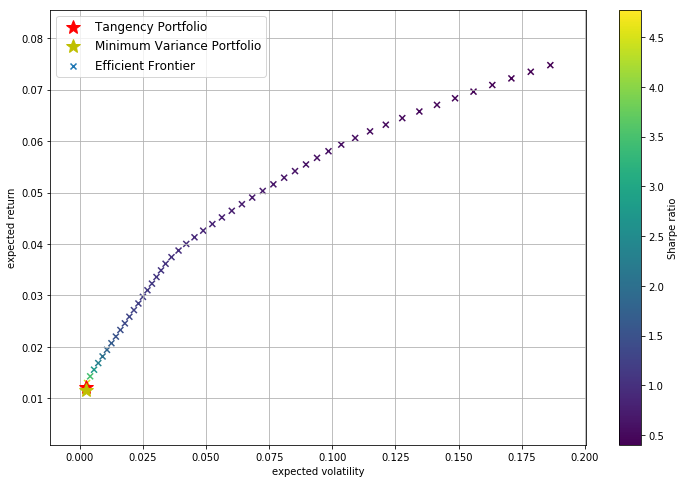

In [71]:
plt.figure(figsize=(12,8))
#圈圈：模擬點
#plt.scatter(port_variance, port_returns, c=port_returns/port_variance, marker='o')
# 叉號：有效前緣
plt.scatter(target_variance, target_returns, c=target_returns/target_variance, marker='x', label='Efficient Frontier')
#紅星：最高Sharpe
plt.plot(statistics(opts['x'])[1],statistics(opts['x'])[0],'r*', markersize=15.0, label='Tangency Portfolio')
#黃星：MVP
plt.plot(statistics(optv['x'])[1],statistics(optv['x'])[0],'y*', markersize=15.0, label='Minimum Variance Portfolio')

plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend(loc='upper left', fontsize=12)
plt.colorbar(label='Sharpe ratio')
plt.title("Betterment's Efficient Frontier")
plt.show()

- 匯出效率前緣上的點資料（存成csv）

In [42]:
ret_var = np.vstack((target_returns,target_variance))
np.savetxt("Betterment.csv", ret_var, delimiter=",")

#### 9. 加入新一檔ETF

- try: VUG, IVW, IUSG, VOT, SCHG, IJK
- fail: VOT, IJK
- success: SCHG, VUG, IUSG(better)

In [194]:
add_etf = web.DataReader('QQQ', 'yahoo', '4/1/2015', datetime.date.today())
data['QQQ'] = add_etf['Adj Close']
new_q = len(data.columns)

data.head()

,IVE,VTI,VEA,VWO,IWS,IWN,SHV,VTIP,IUSB,LQD,BNDX,VWOB,MUB,QQQ
Date,,,,,,,,,,,,,,
2015-03-31,81.945343,97.390610,34.281384,35.533504,67.267891,93.617088,104.539825,45.346844,45.074539,102.635757,47.938328,61.866901,98.075836,100.784111
2015-04-01,81.688614,97.209015,34.522369,36.011684,67.089142,93.780373,104.539825,45.440422,45.074112,102.930870,47.952518,62.228790,98.126472,100.259209
2015-04-02,81.971909,97.517754,34.780582,36.568111,67.401985,94.125061,104.530380,45.449783,44.968620,102.761749,47.863811,62.380577,97.975410,100.326019
2015-04-06,82.627052,98.189728,35.116238,37.011520,67.884613,94.578575,104.539825,45.562069,45.034550,102.897026,47.961384,62.612198,97.966499,101.146805
2015-04-07,82.361458,97.862808,35.116238,36.924583,67.446655,93.834793,104.539825,45.505928,45.069710,103.269104,47.925911,62.524330,98.082031,100.975021


In [195]:
new_returns = np.log(data / data.shift(1))
new_returns.head()

,IVE,VTI,VEA,VWO,IWS,IWN,SHV,VTIP,IUSB,LQD,BNDX,VWOB,MUB,QQQ
Date,,,,,,,,,,,,,,
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,-0.003138,-0.001866,0.007005,0.013367,-0.002661,0.001743,0.00000,0.002061,-0.000009,0.002871,0.000296,0.005832,0.000516,-0.005222
2015-04-02,0.003462,0.003171,0.007452,0.015333,0.004652,0.003669,-0.00009,0.000206,-0.002343,-0.001644,-0.001852,0.002436,-0.001541,0.000666
2015-04-06,0.007961,0.006867,0.009604,0.012053,0.007135,0.004807,0.00009,0.002467,0.001465,0.001316,0.002036,0.003706,-0.000091,0.008148
2015-04-07,-0.003220,-0.003335,0.000000,-0.002352,-0.006472,-0.007895,0.00000,-0.001233,0.000780,0.003610,-0.000740,-0.001404,0.001179,-0.001700


In [196]:
new_annual_returns = new_returns.mean()*252
new_annual_returns

IVE     0.049968
VTI     0.074776
VEA     0.004803
VWO     0.000650
IWS     0.010451
IWN    -0.013180
SHV     0.011756
VTIP    0.017937
IUSB    0.033424
LQD     0.046834
BNDX    0.032693
VWOB    0.032177
MUB     0.028572
QQQ     0.147652
dtype: float64

In [197]:
new_weights = np.random.random(new_q)
new_weights /= np.sum(new_weights)
new_weights

array([0.00418884, 0.02518302, 0.16144574, 0.00941176, 0.04130531,
       0.17853741, 0.02768637, 0.12374901, 0.10592882, 0.14680556,
       0.02798031, 0.00108642, 0.02060241, 0.12608903])

#### New Tangency Portfolio

In [198]:
def new_statistics(new_weights):
    new_weights = np.array(new_weights)
    port_return = np.sum(new_returns.mean()*new_weights)*252
    port_variance = np.sqrt(np.dot(new_weights.T, np.dot(new_returns.cov()*252, new_weights)))
    return np.array([port_return, port_variance, port_return/port_variance])

# 最小化Sharpe的負值
def new_min_sharpe(new_weights):
    return -new_statistics(new_weights)[2]

# 限制權重總和為1
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# 限制權重範圍在0和1之間
new_bnds = tuple((0,1) for x in range(new_q))
# 優化起始參數值(x0)
new_opts = sco.minimize(new_min_sharpe, new_q*[1./new_q,], method='SLSQP', bounds=new_bnds, constraints=cons)

new_opts

     fun: -4.94856474676311
     jac: array([ 4.39767057e+00,  6.13681000e+00,  2.76873011e+01,  4.27002060e+01,
        2.76224944e+01,  1.57127805e+01,  3.51667404e-06,  2.29537487e-03,
        3.36776417e+00,  1.00366148e+01,  9.75728035e-05,  6.98733675e+00,
        2.98199046e+00, -2.65479088e-03])
 message: 'Optimization terminated successfully.'
    nfev: 320
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([3.63113700e-13, 6.30550070e-13, 1.42692984e-12, 2.45763436e-12,
       1.55105048e-12, 7.58839106e-13, 9.84601720e-01, 2.73850224e-03,
       0.00000000e+00, 5.90122750e-12, 9.02733676e-03, 0.00000000e+00,
       2.68297493e-13, 3.63244090e-03])

In [199]:
new_opts['x'].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.985, 0.003, 0.   ,
       0.   , 0.009, 0.   , 0.   , 0.004])

In [200]:
new_statistics(new_opts['x'].round(3))

array([1.25178796e-02, 2.53081268e-03, 4.94618971e+00])

#### New Minimum Variance Portfolio

In [201]:
def new_min_variance(new_weights):
    return new_statistics(new_weights)[1]

new_optv = sco.minimize(new_min_variance, new_q*[1./new_q,], method='SLSQP', bounds=new_bnds, constraints=cons)

new_optv

     fun: 0.0024477005909684293
     jac: array([0.00196866, 0.00320261, 0.00224542, 0.00476952, 0.0070933 ,
       0.00227664, 0.00244819, 0.00239299, 0.00539545, 0.00870818,
       0.00261085, 0.00381146, 0.00365696, 0.00297739])
 message: 'Optimization terminated successfully.'
    nfev: 225
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([7.79006105e-19, 0.00000000e+00, 3.23217547e-19, 2.36275565e-18,
       9.56077148e-19, 2.86663041e-03, 9.97133370e-01, 0.00000000e+00,
       0.00000000e+00, 1.81413133e-17, 0.00000000e+00, 1.13031311e-17,
       0.00000000e+00, 1.93146906e-18])

In [202]:
# new_MVP 的預期收益率、預期波動率、最大Sharpe
new_statistics(new_optv['x']).round(3)

array([1.200e-02, 2.000e-03, 4.773e+00])

#### 繪製新的效率前緣

In [203]:
def new_min_variance(new_weights):
    return new_statistics(new_weights)[1]

# 在不同目標收益率(target_returns)水平循環時，最小化的約束條件會變化
new_target_returns = np.linspace(new_statistics(new_optv['x'])[0], new_annual_returns.max(), 50)
new_target_variance = []
#cnt = 0

for tar in new_target_returns:
    #cnt+=1
    new_cons = ({'type':'eq', 'fun': lambda x: new_statistics(x)[0]-tar},
           {'type':'eq', 'fun': lambda x: np.sum(x) - 1})
    new_res = sco.minimize(new_min_variance, new_q*[1./new_q,], method='SLSQP', bounds=new_bnds, constraints=new_cons)
    new_target_variance.append(new_res['fun'])
    #print(cnt)

new_target_variance = np.array(new_target_variance)

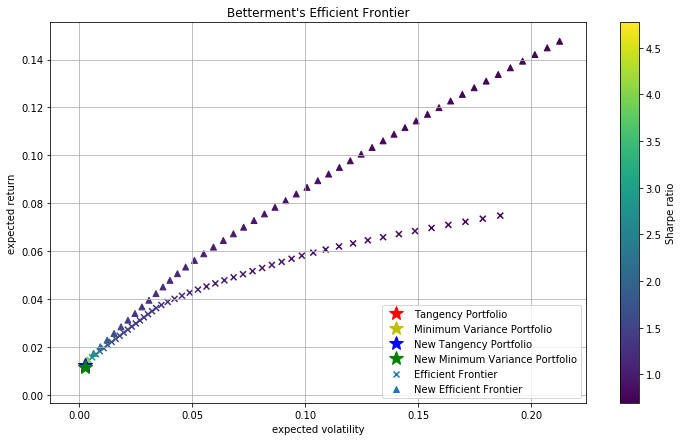

Decrease in MVP volatility: 5.580250655220359e-09
Increase in tangency porfolio's sharpe ratio: 0.05183198664410238


In [215]:
#舊圖
plt.figure(figsize=(12,7))
# 叉號：有效前緣
plt.scatter(target_variance, target_returns, c=target_returns/target_variance, marker='x', label='Efficient Frontier')
#紅星：最高Sharpe
plt.plot(statistics(opts['x'])[1],statistics(opts['x'])[0],'r*', markersize=15.0, label='Tangency Portfolio')
#黃星：MVP
plt.plot(statistics(optv['x'])[1],statistics(optv['x'])[0],'y*', markersize=15.0, label='Minimum Variance Portfolio')


#新圖
# 叉號：有效前緣
plt.scatter(new_target_variance, new_target_returns, c=new_target_returns/new_target_variance, marker='^', label='New Efficient Frontier')
#紅星：最高Sharpe
plt.plot(new_statistics(new_opts['x'])[1],new_statistics(new_opts['x'])[0],'b*', markersize=15.0, label='New Tangency Portfolio')
#黃星：MVP
plt.plot(new_statistics(new_optv['x'])[1],new_statistics(new_optv['x'])[0],'g*', markersize=15.0, label='New Minimum Variance Portfolio')


plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend(loc='lower right', fontsize=10)
plt.colorbar(label='Sharpe ratio')
plt.title("Betterment's Efficient Frontier: After")
plt.show()

print("Decrease in MVP volatility:", optv['fun']-new_optv['fun'])
print("Increase in tangency porfolio's sharpe ratio:",(-new_opts['fun'])-(-opts['fun']))